In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add project root to path and import config
project_root = Path('.').resolve().parent
sys.path.insert(0, str(project_root))
import config

# Set up data path using config
data_path = project_root / config.data_dir

In [2]:
# Load COVID-19 data using config paths
try:
    # Use config.py for path - works across different systems
    file_path = data_path / "owid-covid-data.csv"
    
    print(f"Loading data from: {file_path}")
    
    # Load only critical columns + first 100k rows for quick exploration
    df = pd.read_csv(
        file_path,
        usecols=['date', 'location', 'new_cases', 'total_deaths', 'total_cases'],
        parse_dates=['date'],
        nrows=100000
    )
    print("✓ Loaded successfully!")
    print(f"  Rows: {len(df):,}")
    print(f"  Columns: {list(df.columns)}")
    print("\nFirst 5 rows:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Data file not found at: {file_path}")
    print(f"\n💡 To get the data:")
    print(f"   1. Download from: https://github.com/owid/covid-19-data")
    print(f"   2. Save to: {data_path}/")
    print(f"   3. Or create a Data/ directory and place the CSV there")
except Exception as e:
    print(f"❌ Error: {e}")

Loading data from: /Users/john/Python/PublicHealthPortfolio/my-projects/covid19-tracker/Data/owid-covid-data.csv
✓ Loaded successfully!
  Rows: 100,000
  Columns: ['location', 'date', 'total_cases', 'new_cases', 'total_deaths']

First 5 rows:
      location       date  total_cases  new_cases  total_deaths
0  Afghanistan 2020-01-05          0.0        0.0           0.0
1  Afghanistan 2020-01-06          0.0        0.0           0.0
2  Afghanistan 2020-01-07          0.0        0.0           0.0
3  Afghanistan 2020-01-08          0.0        0.0           0.0
4  Afghanistan 2020-01-09          0.0        0.0           0.0


In [3]:
# Task 1: Load and Explore the Complete Dataset
try:
    # Use config.py path - portable across systems
    file_path = data_path / "owid-covid-data.csv"
    
    print("Loading complete dataset...")
    print(f"Path: {file_path}\n")
    
    # Load full dataset
    df = pd.read_csv(file_path, parse_dates=['date'])
    
    # Display first few rows
    print("First 5 rows:")
    print(df.head())
    
    # Dataset structure
    print("\nDataset structure:")
    print(df.info())
    
    # Missing values
    print("\nMissing values:")
    print(df.isnull().sum())

except FileNotFoundError:
    print(f"❌ Data file not found at: {file_path}")
    print(f"\n💡 Download the data from:")
    print(f"   https://github.com/owid/covid-19-data/tree/master/public/data")
    print(f"   Save as: {data_path}/owid-covid-data.csv")
except Exception as e:
    print(f"\n❌ Error loading data: {e}")

Loading complete dataset...
Path: /Users/john/Python/PublicHealthPortfolio/my-projects/covid19-tracker/Data/owid-covid-data.csv

First 5 rows:
  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan 2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0    

In [4]:
# Task 2: Basic Data Analysis
try:
    # Basic statistics
    print("\nBasic statistics for numerical columns:")
    print(df.describe())
    
    # Group by location and get mean cases
    print("\nAverage new cases by location:")
    avg_cases = df.groupby('location')['new_cases'].mean().sort_values(ascending=False)
    print(avg_cases.head(10))
    
    # Latest data snapshot
    print("\nLatest data snapshot:")
    latest_date = df['date'].max()
    latest_data = df[df['date'] == latest_date]
    print(latest_data.head())

except Exception as e:
    print(f"\nAnalysis error: {e}")


Basic statistics for numerical columns:
                                date   total_cases     new_cases  \
count                         429300  4.118040e+05  4.101590e+05   
mean   2022-04-20 18:45:38.515723264  7.365292e+06  8.017360e+03   
min              2020-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2021-03-05 00:00:00  6.280750e+03  0.000000e+00   
50%              2022-04-20 00:00:00  6.365300e+04  0.000000e+00   
75%              2023-06-08 00:00:00  7.582720e+05  0.000000e+00   
max              2024-08-04 00:00:00  7.758668e+08  4.423623e+07   
std                              NaN  4.477582e+07  2.296649e+05   

       new_cases_smoothed  total_deaths     new_deaths  new_deaths_smoothed  \
count        4.089290e+05  4.118040e+05  410608.000000        409378.000000   
mean         8.041026e+03  8.125957e+04      71.852139            72.060828   
min          0.000000e+00  0.000000e+00       0.000000             0.000000   
25%          0.000000e+00  4.3

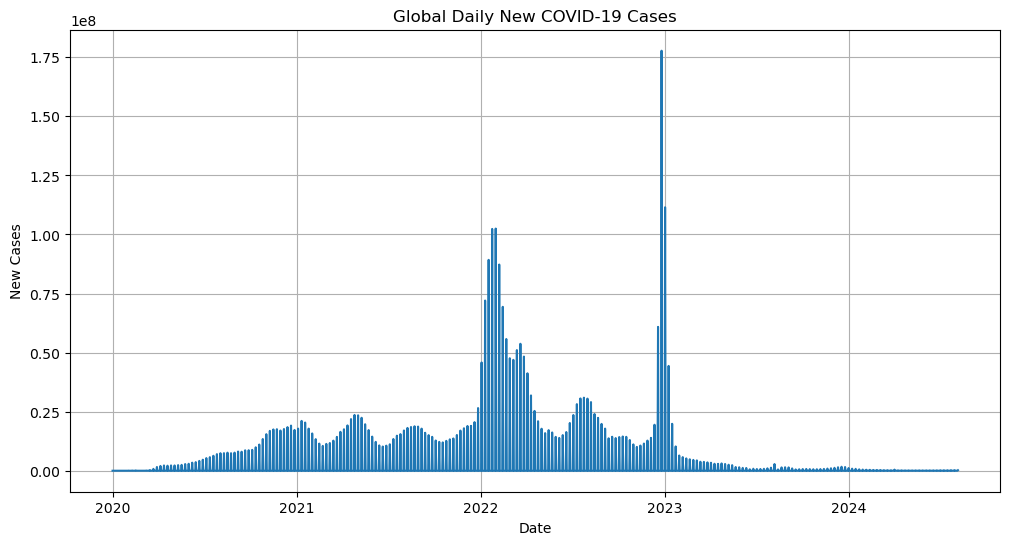

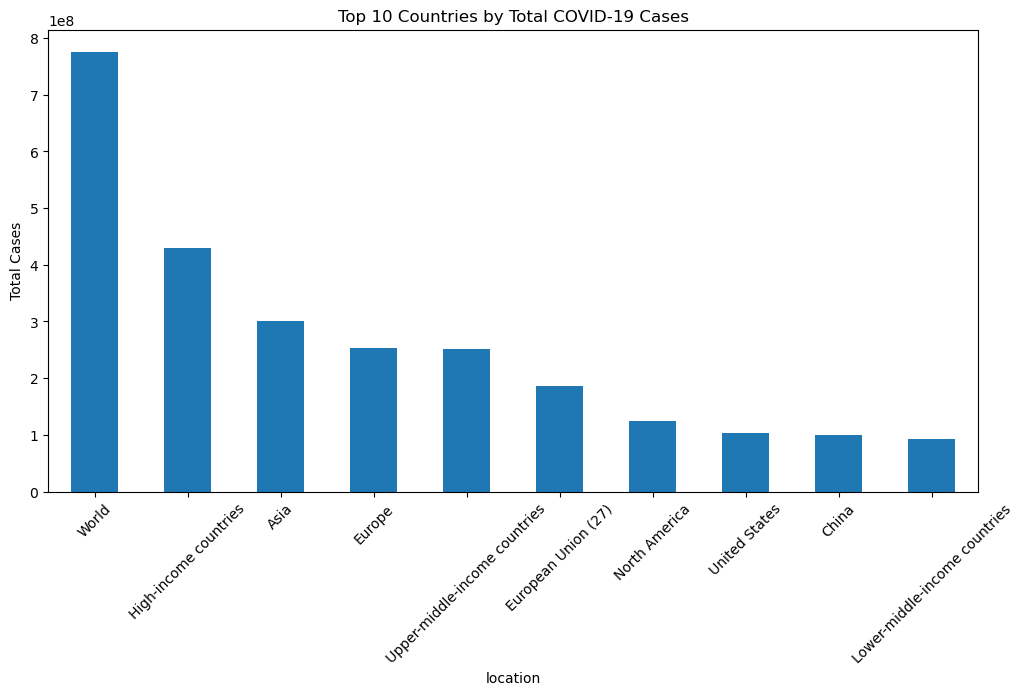

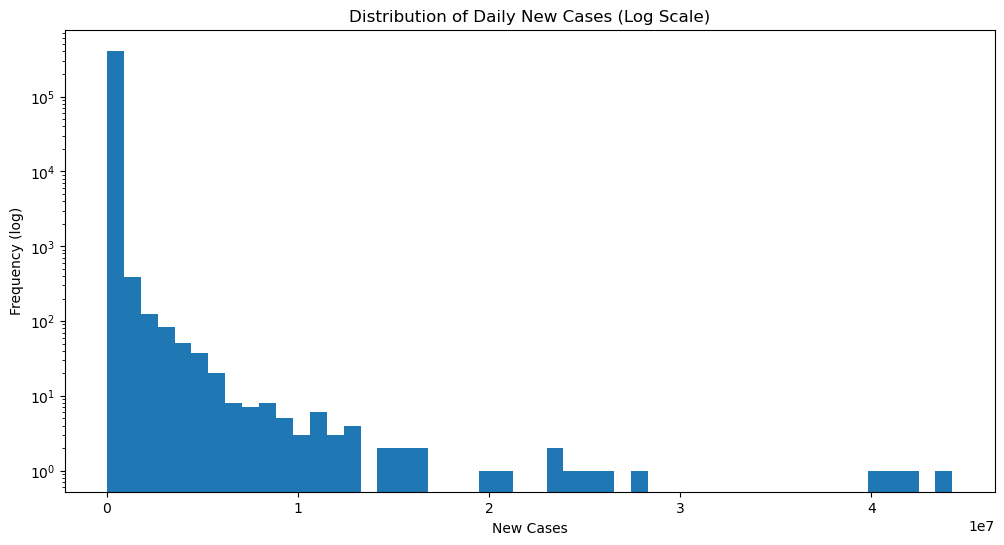

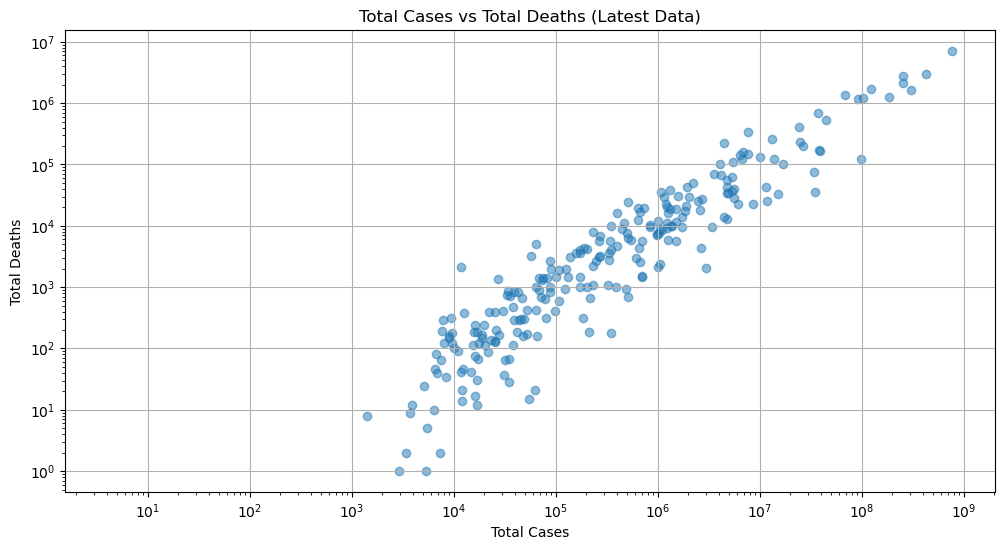

In [5]:
# Task 3: Data Visualization
try:
    # Set larger figure size for better visibility
    plt.rcParams['figure.figsize'] = (12, 6)
    
    # 1. Line chart - Global new cases over time
    global_cases = df.groupby('date')['new_cases'].sum()
    plt.plot(global_cases.index, global_cases.values)
    plt.title('Global Daily New COVID-19 Cases')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.grid(True)
    plt.show()
    
    # 2. Bar chart - Top 10 countries by total cases
    top_countries = df.groupby('location')['total_cases'].max().nlargest(10)
    top_countries.plot(kind='bar')
    plt.title('Top 10 Countries by Total COVID-19 Cases')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=45)
    plt.show()
    
    # 3. Histogram - Distribution of new cases
    plt.hist(df['new_cases'].dropna(), bins=50, log=True)
    plt.title('Distribution of Daily New Cases (Log Scale)')
    plt.xlabel('New Cases')
    plt.ylabel('Frequency (log)')
    plt.show()
    
    # 4. Scatter plot - Total cases vs total deaths
    latest = df[df['date'] == df['date'].max()]
    plt.scatter(latest['total_cases'], latest['total_deaths'], alpha=0.5)
    plt.title('Total Cases vs Total Deaths (Latest Data)')
    plt.xlabel('Total Cases')
    plt.ylabel('Total Deaths')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"\nVisualization error: {e}")